<a href="https://colab.research.google.com/github/neerajac19/cardiovascular-risk-prediction/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

***World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.***



• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can beconsidered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module4/Week 2/Capstone Project/Copy of data_cardiovascular_risk.csv')

In [4]:
dataset1 = dataset.copy()

In [5]:
dataset1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
dataset1.shape

(3390, 17)

In [8]:
dataset1.rename(columns={"TenYearCHD":"RISK"},inplace=True)

***Correlation Matrix***

*Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.*

* *Lighter shades represents positive correlation*
* *Darker shades represents negative correlation*



In [9]:
px.imshow(dataset1.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [10]:
dependent_variable = 'RISK'  
independent_variables = list(set(dataset1.columns.tolist())-{dependent_variable})

### ***Data Preprocessing***

*Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.*

*The concepts that I will cover in this project are*

* *Handling Null Values*
* *Feature Scaling*
* *Handling Categorical Variables*





### Handling Null Values :

In [11]:
dataset1.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
RISK                 0
dtype: int64

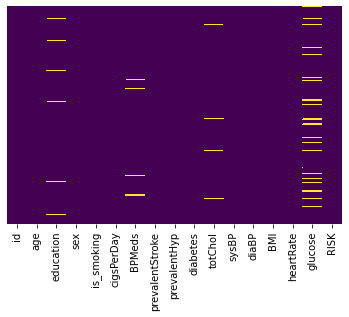

In [12]:
sns.heatmap(dataset1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*It is not the best option to remove the rows and columns from our dataset as it* *can result in significant information loss.*
*So we can handle null values with the help of Imputation.*

**Imputation:**

*Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.*

In [13]:
column_datatypes= dataset1.drop("RISK",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

In [14]:
simp_imputer_cat = SimpleImputer(strategy="most_frequent")
simp_imputer_cat.fit(dataset1[categorical_columns])
dataset1[categorical_columns] = simp_imputer_cat.transform(dataset1[categorical_columns])

In [15]:
simp_imputer_con = SimpleImputer(strategy="median")
simp_imputer_con.fit(dataset1[continous_columns])
dataset1[continous_columns] = simp_imputer_con.transform(dataset1[continous_columns])

In [16]:
dataset1.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
RISK               0
dtype: int64

***Outliers***

*A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot is a standardized way of displaying the distribution of data based on the five number summary:*

*   *Minimum*
*   *First quartile*
*   *Median*
*   *Third quartile*
*   *Maximum*

*In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum*.


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

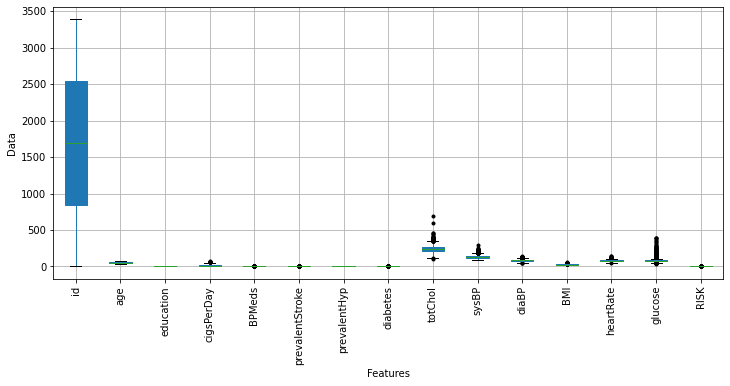

In [17]:
plt.subplots(figsize=(12,5))
dataset1.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [18]:
def outlier_limits(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_limits(df, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(df, variable, q1 = q1, q3 = q3)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit
    
for variable in dataset1[continous_columns].columns:
    replace_with_limits(dataset1, variable)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

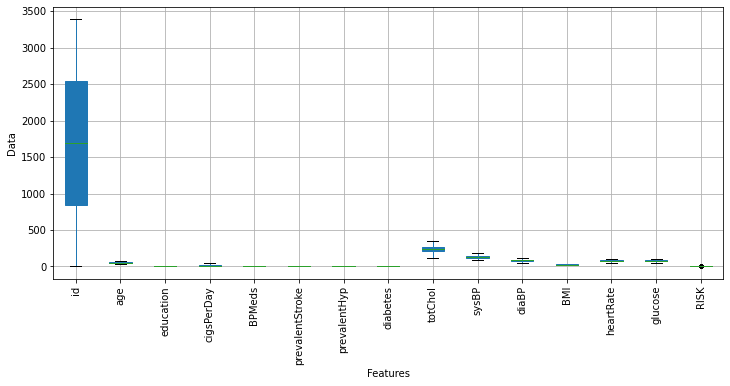

In [19]:
plt.subplots(figsize=(12,5))
dataset1.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

## **EDA**

### Sex vs risk

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

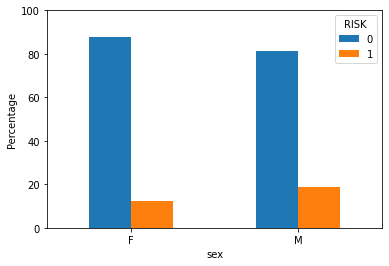

In [20]:
freq_df = dataset1.groupby('RISK')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

### Smoking vs Risk

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

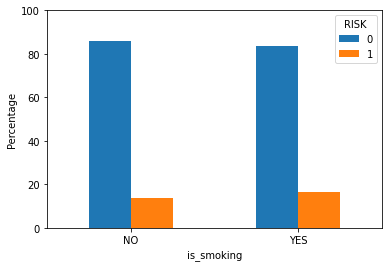

In [21]:
freq_df = dataset1.groupby('RISK')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

### Prevalent stroke

(array([0]), <a list of 1 Text major ticklabel objects>)

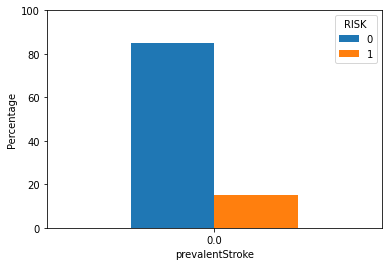

In [22]:
freq_df = dataset1.groupby('RISK')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

### Prevalent Hypertension

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

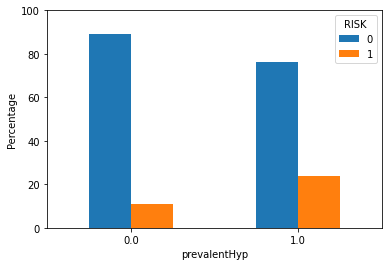

In [23]:
freq_df = dataset1.groupby('RISK')['prevalentHyp'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

### Diabetes

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

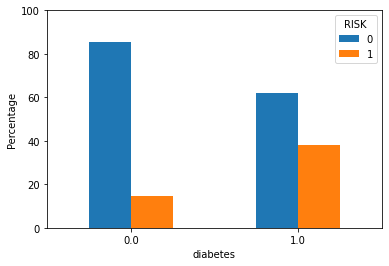

In [21]:
freq_df = dataset1.groupby('RISK')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Age wise Effected People')

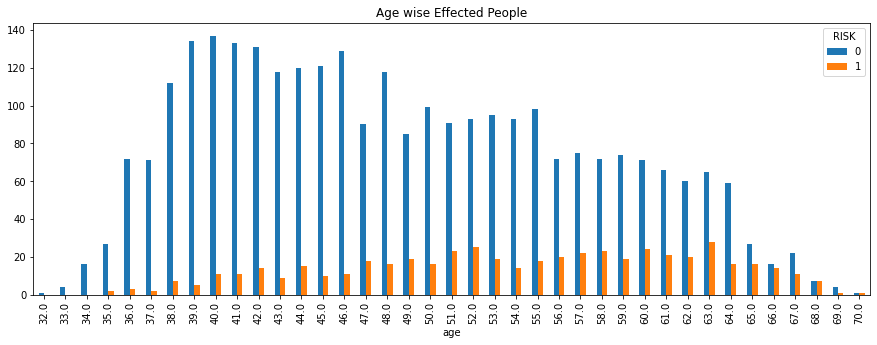

In [24]:
plt.rcParams['figure.figsize'] = (15, 5)
dataset1.groupby(['age','RISK'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise Effected People')

In [25]:
dataset1['age_group'] = dataset1['age'].apply(lambda x : 5*(x//5))

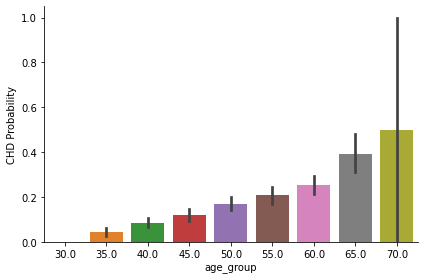

In [26]:
ax=sns.factorplot('age_group', 'RISK', kind='bar', data = dataset1, size=4, aspect=1.5)
ax.set_ylabels('CHD Probability')

Text(0.5, 1.0, 'Education with Ten years CHD')

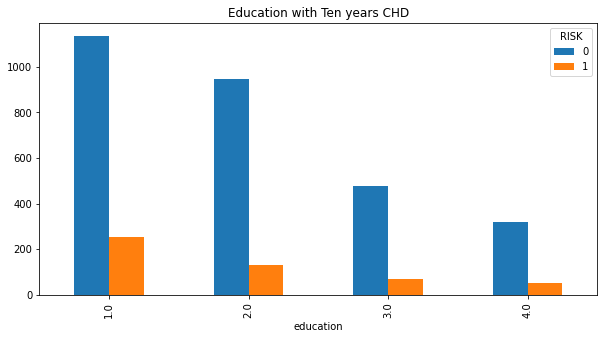

In [27]:
plt.rcParams['figure.figsize'] = (10, 5)
dataset1.groupby(['education','RISK'])['id'].count().unstack().plot(kind='bar')
plt.title('Education with Ten years CHD')

*The positive CHD cases seems to be more prevalent in older people.*


# Feature engineering


*Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.*

In [29]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [30]:
dataset1['Hypertension'] = dataset1.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [31]:
dataset1.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RISK,age_group,Hypertension
3385,3385.0,60.0,1.0,F,NO,0.0,0.0,0.0,0.0,0.0,261.0,123.5,79.00,29.28,70.0,103.0,0,60.0,2
3386,3386.0,46.0,1.0,F,NO,0.0,0.0,0.0,0.0,0.0,199.0,102.0,56.00,21.96,80.0,84.0,0,45.0,0
3387,3387.0,44.0,3.0,M,YES,3.0,0.0,0.0,1.0,0.0,351.0,164.0,113.25,28.92,73.0,72.0,1,40.0,6
3388,3388.0,60.0,1.0,M,NO,0.0,0.0,0.0,1.0,0.0,191.0,167.0,105.00,23.01,80.0,85.0,0,60.0,6
3389,3389.0,54.0,3.0,F,NO,0.0,0.0,0.0,0.0,0.0,288.0,124.0,77.00,29.88,79.0,92.0,0,50.0,2


In [32]:
dataset1.drop(['sysBP','diaBP','age'],axis=1,inplace=True)

*We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :*

**Label Encoding**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
dataset1['sex']=le.fit_transform(dataset1['sex'])
dataset1['is_smoking']=le.fit_transform(dataset1['is_smoking'])

In [35]:
dataset1.head()

,id,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,RISK,age_group,Hypertension
0,0.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,25.38,90.0,80.0,1,60.0,2
1,1.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,29.77,72.0,75.0,0,35.0,5
2,2.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,0,45.0,1
3,3.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,28.26,68.0,94.0,1,50.0,3
4,4.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,0,60.0,2


### **Feature Selection**

In [36]:
from sklearn.feature_selection import f_classif
import scipy.stats as stats

In [37]:
alpha=0.05

In [38]:
# using one-way ANOVA test to determine dependency between continuous variables and the target categorical variable
def cont_dependency(feature,alpha=alpha):
  F, p = stats.f_oneway(dataset1[dataset1['RISK'] == 1][feature], dataset1[dataset1['RISK'] == 0][feature])
  print('significance=%.3f, p=%.5f' % (alpha, p))
  if p <= alpha:
    print(f"Ten year Risk of CHD is dependent on the continuous variable {feature}")
    return True
  else:
    print(f"Ten year Risk of CHD is not dependent on continuous variable {feature}")
    return False

In [39]:
for i in dataset1.columns:
  cont_dependency(i)

significance=0.050, p=0.56581
Ten year Risk of CHD is not dependent on continuous variable id
significance=0.050, p=0.00242
Ten year Risk of CHD is dependent on the continuous variable education
significance=0.050, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable sex
significance=0.050, p=0.04684
Ten year Risk of CHD is dependent on the continuous variable is_smoking
significance=0.050, p=0.00007
Ten year Risk of CHD is dependent on the continuous variable cigsPerDay
significance=0.050, p=nan
Ten year Risk of CHD is not dependent on continuous variable BPMeds
significance=0.050, p=nan
Ten year Risk of CHD is not dependent on continuous variable prevalentStroke
significance=0.050, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable prevalentHyp
significance=0.050, p=nan
Ten year Risk of CHD is not dependent on continuous variable diabetes
significance=0.050, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable totChol
significan

*Ten year risk of CHD deos not dependent on the continuous variables heartRate,id,is_smoking.*

In [ ]:
dataset1.drop(columns=['prevalentHyp','id','diabetes', 'cigsPerDay'], inplace=True)

In [24]:
dataset1.drop(['id','heartRate'],axis=1,inplace=True)

In [25]:
dataset1.shape

(3390, 15)

## *Imbalanced Data*

*The data is not properly balanced as the number of people without the disease greately exceeds the number of people with the disease.* 

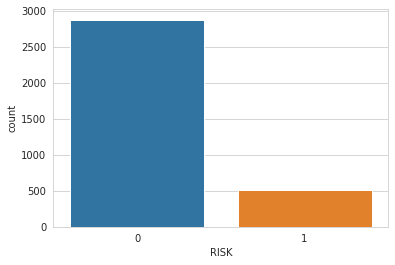

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='RISK',data=dataset1)

In [27]:
risk_Yes = dataset1[dataset1['RISK']==1]
risk_No = dataset1[dataset1['RISK']==0]

In [28]:
print(risk_Yes.shape,risk_No.shape)

(511, 15) (2879, 15)


In [29]:
x = dataset1.drop('RISK',axis=1)
y = dataset1['RISK']

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)
# X_sm, y_sm = smote.fit(X,y)

In [31]:
y_sm=pd.DataFrame(y_sm)
y_sm.value_counts()

RISK
0       2879
1       2879
dtype: int64

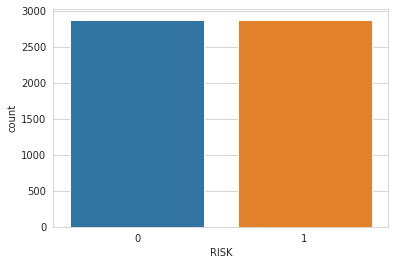

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='RISK',data=y_sm)

*Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data*

In [33]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm,y_sm,test_size=0.20)

In [34]:
print(X_Train.shape)
print(X_Test.shape)

(4606, 14)
(1152, 14)


##  Feature Scaling
 
 *Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it*.

 *Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.*

*StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.*

In [35]:
scaler= StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

*Chossing the right Cross-Validation*

*Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used. Here we are using:*

***k-fold cross-validation***

*As you can see, we divide the samples and the targets associated with them. We can divide the data into k different sets which are exclusive of each other. This is known as k-fold cross-validation, We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.*

*We have used a number of machine learning algorithms*

### ***LOGISTIC REGRESSION***

*Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.*

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [77]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [78]:
clf=GridSearchCV(log_class,grid,n_jobs=-1,cv=cv,scoring='f1_macro')
clf.fit(X_Train,Y_Train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [79]:
Y_pred=clf.predict(X_Test)
lr_ac = accuracy_score(Y_Test,Y_pred)
print(lr_ac)
print(classification_report(Y_Test,Y_pred))

0.6493055555555556
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       571
           1       0.65      0.65      0.65       581

    accuracy                           0.65      1152
   macro avg       0.65      0.65      0.65      1152
weighted avg       0.65      0.65      0.65      1152



### **Performance metric**

*There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).*

**Confusion matrix** : *A confusion matrix is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.*



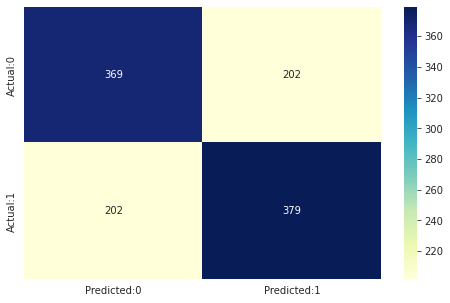

In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_Test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Figure size 1080x576 with 0 Axes>

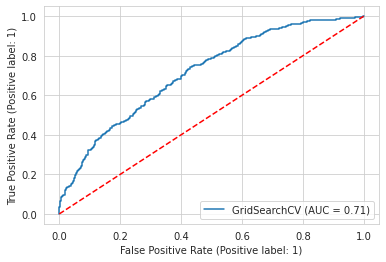

In [81]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(clf,X_Test,Y_Test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

*A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.*

*The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels.*

### ***K Nearest Neighbor***

*K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition*

In [49]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [50]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
bestPermet=knn_cv.best_params_
knn_cv.best_params_

{'n_neighbors': 2}

In [52]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_Train, Y_Train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_Train, Y_Train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_Test, Y_Test) 

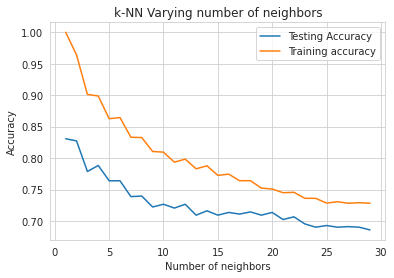

In [53]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=bestPermet['n_neighbors'])
# Fit the model
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(n_neighbors=2)

In [56]:
y_test_pred_knn = knn.predict(X_Test)

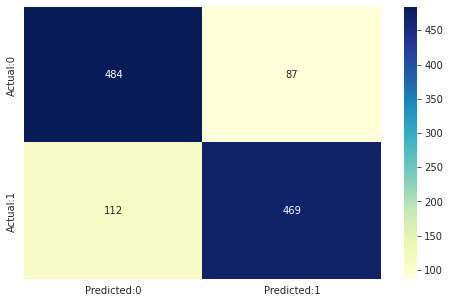

In [57]:
cm=confusion_matrix(Y_Test,y_test_pred_knn)
conf_matrix_knn=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_knn, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
y_pred_proba = knn.predict_proba(X_Test)[:,1]

In [59]:
from sklearn.metrics import plot_roc_curve
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred_proba)
roc_auc_score(Y_Test,y_pred_proba)

0.865008696281247

In [60]:
knn_ac = accuracy_score(Y_Test,y_test_pred_knn)
print(knn_ac)

0.8272569444444444


In [61]:
print(classification_report(Y_Test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       571
           1       0.84      0.81      0.82       581

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



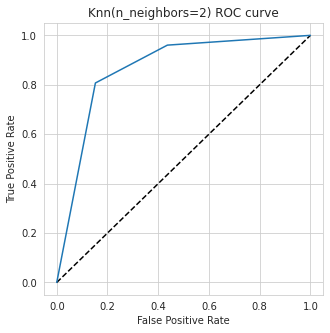

In [62]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

## ***SVM***

***A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.***

In [36]:
from sklearn.svm import SVC

In [37]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_Train, Y_Train)
    svc_scores.append(round(svc_classifier.score(X_Test, Y_Test),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

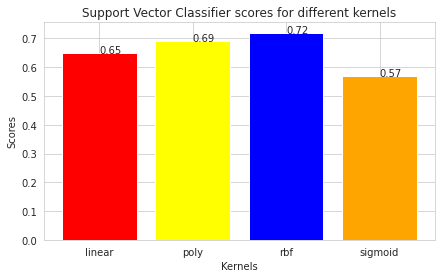

In [38]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [39]:
svm=SVC(probability=True)
svm.fit(X_Train,Y_Train)

SVC(probability=True)

In [40]:
svm.score(X_Test,Y_Test)

0.7222222222222222

In [41]:
y_svm_predi=svm.predict(X_Test)

In [47]:
acc_svm = accuracy_score(Y_Test,y_svm_predi)
print(acc_svm)

0.7222222222222222


In [42]:
conf_matrix_svm = confusion_matrix(Y_Test,y_svm_predi)

array([[399, 172],
       [148, 433]])

In [43]:
y_svm_predict_pro=svm.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_Test, y_svm_predict_pro)

In [44]:
roc_auc_score(Y_Test,y_svm_predict_pro)

0.8039252330814375

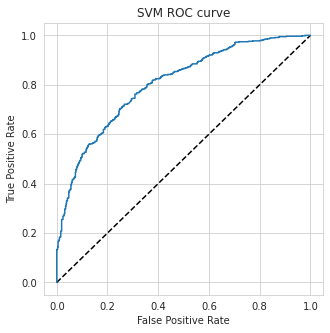

In [45]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

# ***Decision Tree***

*Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.*

In [ ]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

In [ ]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for test
print(classification_report(y_test, test_preds))

# ***Random Forest***

*Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees*



In [63]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_Train, Y_Train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [64]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_

{'max_depth': 12, 'n_estimators': 120}

In [65]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_Train, Y_Train)

RandomForestClassifier(max_depth=12, n_estimators=120)

In [66]:
y_train_preds_rf =  classifier.predict(X_Train)
y_test_preds_rf= classifier.predict(X_Test)

In [67]:
accuracy_score(Y_Train,y_train_preds_rf)

0.9793747286148502

In [70]:
acc_rfc = accuracy_score(Y_Test,y_test_preds_rf)
print(acc_rfc)

0.8689236111111112


In [71]:
y_rf_predict_pro=classifier.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_Test, y_rf_predict_pro)
roc_auc_score(Y_Test,y_rf_predict_pro)

0.9451516348104452

In [72]:
print(classification_report(Y_Test,y_test_preds_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       571
           1       0.89      0.85      0.87       581

    accuracy                           0.87      1152
   macro avg       0.87      0.87      0.87      1152
weighted avg       0.87      0.87      0.87      1152



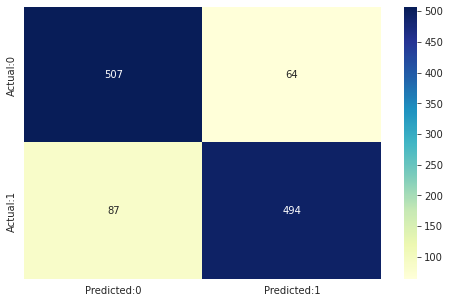

In [73]:
cm=confusion_matrix(Y_Test,y_test_preds_rf)
conf_matrix_rf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_rf, annot=True,fmt='d',cmap="YlGnBu")

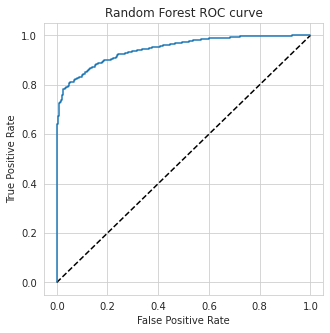

In [74]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

# **Gradient Boosting**

In [ ]:
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
gradientBC.fit(X_Train,Y_Train)

In [ ]:
train_preds =  gradientBC.predict(X_Train)
test_preds  = gradientBC.predict(X_Test)

In [ ]:
accuracy_score(Y_Test,test_preds)

In [ ]:
roc_auc_score(y_train,train_preds)

***Plotting the Accuracy of the models***

*Here we plot the performance or the accuracy of the different machine learning model, in this plot we observe that the different models have diffrent performence.*

Text(0.5, 1.0, 'Model Accracy')

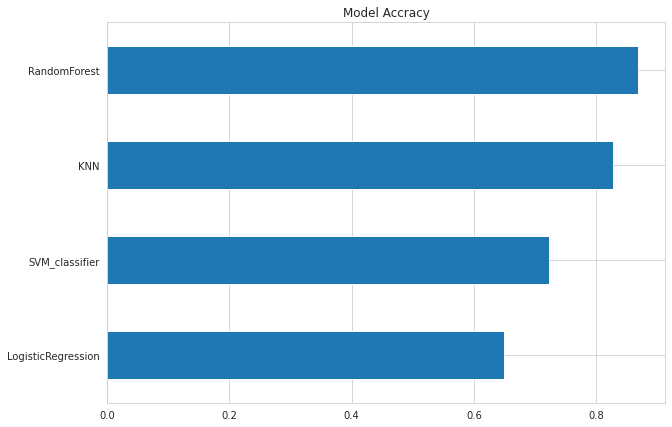

In [82]:
model_accuracy = pd.Series(data=[lr_ac,acc_svm,acc_rfc,knn_ac], 
                index=['LogisticRegression','SVM_classifier',
                                      'RandomForest','KNN'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

In [ ]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Accuracy", "F1-score",'Recall'])
test.add_row(['1','Logistic Regression','0.86','0.65','0.71'])
test.add_row(['2','Random Forest Classifier','0.60','0.75','0.77'])
test.add_row(['3','Naive Bayes Classifier','0.74','0.69','0.67'])
test.add_row(['4','KNearest Neighbors','0.67','0.55','0.57'])
test.add_row(['5','Support Vector Machine','0.70','0.58','0.74'])
print(test)

## ***Summary***

*We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used Plotly, seaborn and matplotlib to do the visualizations. During the data preprocessing part, we converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models, and applied cross validation on it. Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. You could also do some ensemble learning.Lastly, we looked at it’s confusion matrix and computed the models precision.*